# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
#importing necessary libraries (I prefer to do them all at the start)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#mount to Google Drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [94]:
#loading Extraalearn data file
el=pd.read_csv('/content/drive/MyDrive/Python Course/Datasets/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [95]:
el.duplicated().sum()

np.int64(0)

In [96]:
#checking file info, shape, etc.
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [97]:
el.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [98]:
el.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


**OBSERVATIONS**

No missing values.

ID column can be dropped as it only identifies each individual person and will thus mess up our analysis.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [99]:
#dropping ID column as stated above
el=el.drop(['ID'], axis=1)

In [100]:
#separating numerical and categorical values

In [101]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status'] #kept status so it's included in the heatmap later

# Creating categorical variables
cat_cols= ['profile_completed', 'current_occupation', 'last_activity', 'first_interaction', 'print_media_type1',
           'print_media_type2', 'digital_media', 'educational_channels', 'referral']

In [102]:
#checking statistics of continuous categories
el[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [103]:
#checking ratio of paid to unpaid customers
el.status.value_counts(normalize=True)

,proportion
status,
0,0.701431
1,0.298569


**OBSERVATIONS**

Average age is 46 years old.

Average number of website visits is about 3-4.

Average time spent on the website is 12 minutes.

29.9% paid customers.

70.1% unpaid.

In [104]:
# Printing the % sub categories of the discrete categories
for i in cat_cols:
    print(el[i].value_counts(normalize=True))
    print('-'*30)

profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
------------------------------
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
------------------------------
educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dty

Will visualize the discrete categories shortly.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [105]:
el.head(10)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


In [106]:
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

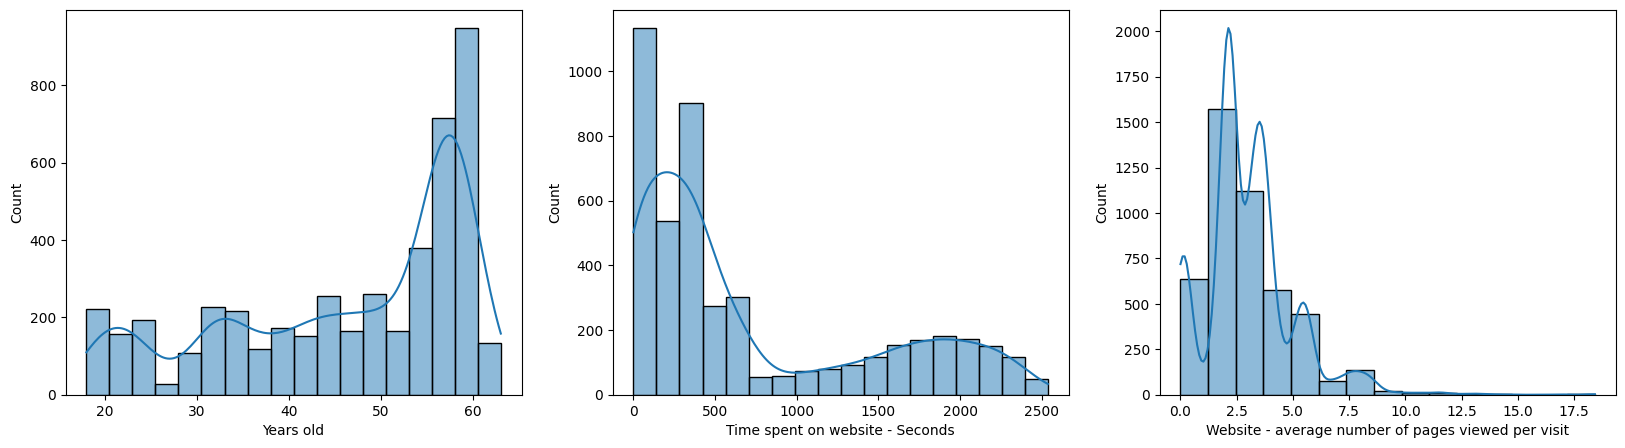

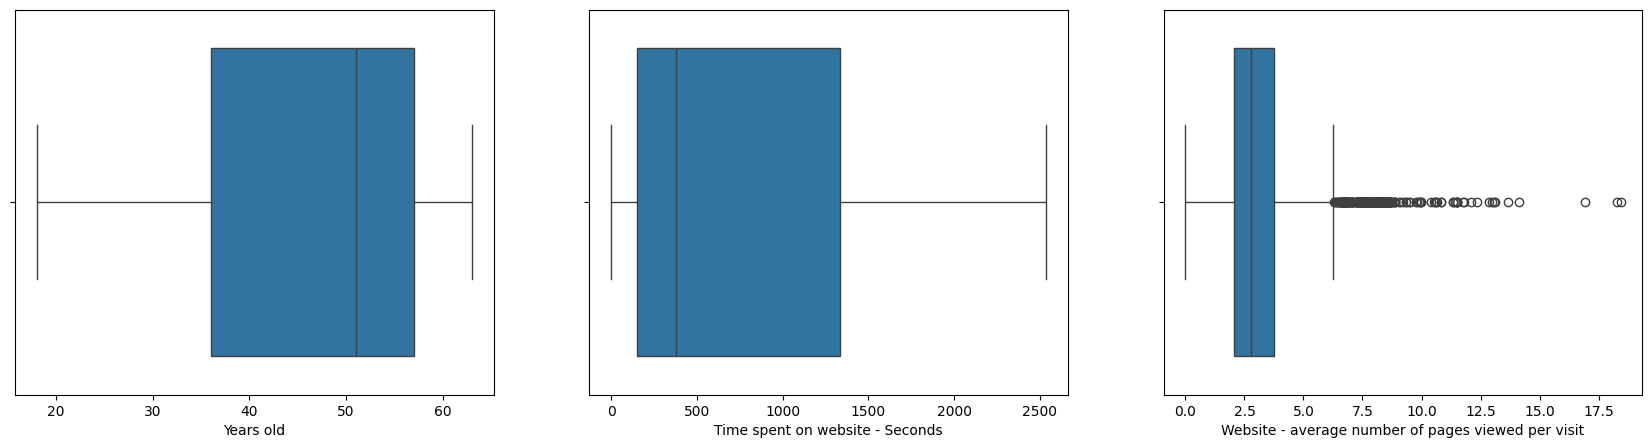

In [107]:
#visualizing continuous data categories
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(data=el, x='age', kde=True)
plt.xlabel('Years old')
plt.subplot(1,3,2)
plt.xlabel('Time spent on website - Seconds')
sns.histplot(data=el, x='time_spent_on_website', kde=True)
plt.subplot(1,3,3)
plt.xlabel('Website - average number of pages viewed per visit')
sns.histplot(data=el, x='page_views_per_visit', bins=15, kde=True)


plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
plt.xlabel('Years old')
sns.boxplot(data=el, x='age')
plt.subplot(1,3,2)
sns.boxplot(data=el, x='time_spent_on_website')
plt.xlabel('Time spent on website - Seconds')
plt.subplot(1,3,3)
sns.boxplot(data=el, x='page_views_per_visit')
plt.xlabel('Website - average number of pages viewed per visit')
plt.show()

**OBSERVATIONS**

Age skews to the left, with the majority of customers between 35-57 years old.

Time spent on the website skews to the right, with a gradual spike to longer sessions. Interestingly, there is a huge window of time most people spend on the site, between 2.5 to 22 minutes. Either they know quickly they're not interested, or they'll take the time to do research before making a decision and/or filling out the necessary forms to become a paid customer.

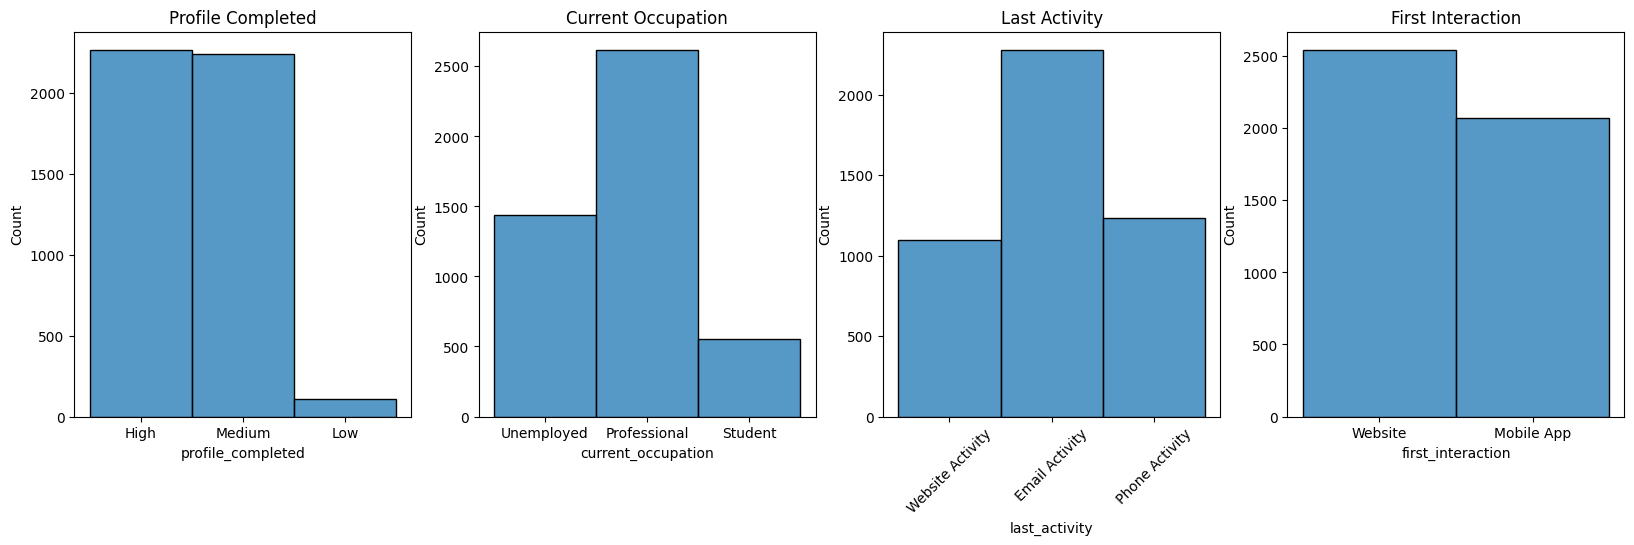

In [108]:
#visualizing discrete data categories

plt.figure(figsize=((20,5)))
plt.subplot(1,4,1)
plt.title("Profile Completed")
sns.histplot(data=el, x='profile_completed')

plt.subplot(1,4,2)
plt.title("Current Occupation")
sns.histplot(data=el, x='current_occupation')

plt.subplot(1,4,3)
plt.title("Last Activity")
sns.histplot(data=el, x='last_activity')
plt.xticks(rotation=45)

plt.subplot(1,4,4)
plt.title("First Interaction")
sns.histplot(data=el, x='first_interaction')
plt.show()

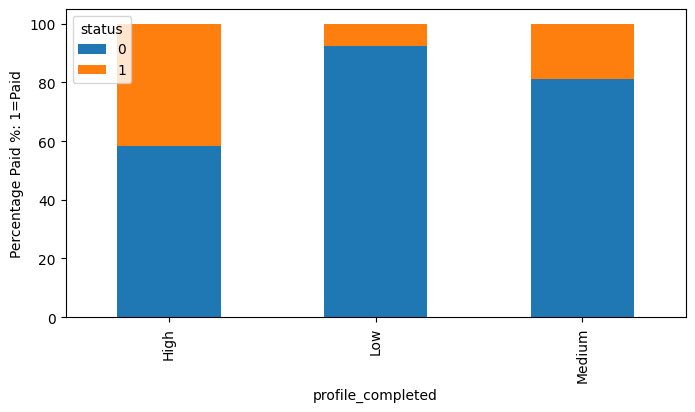

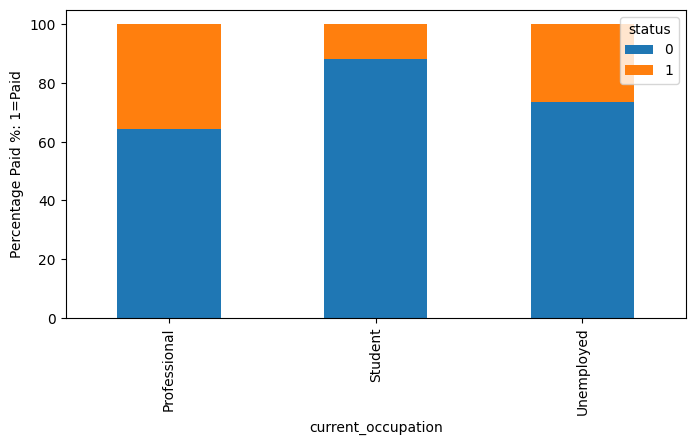

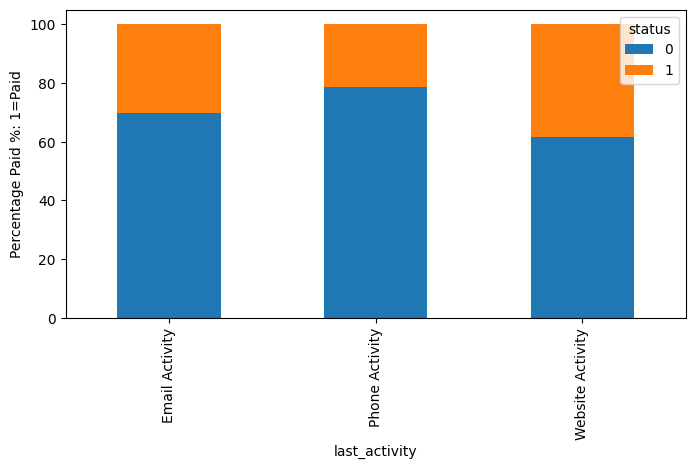

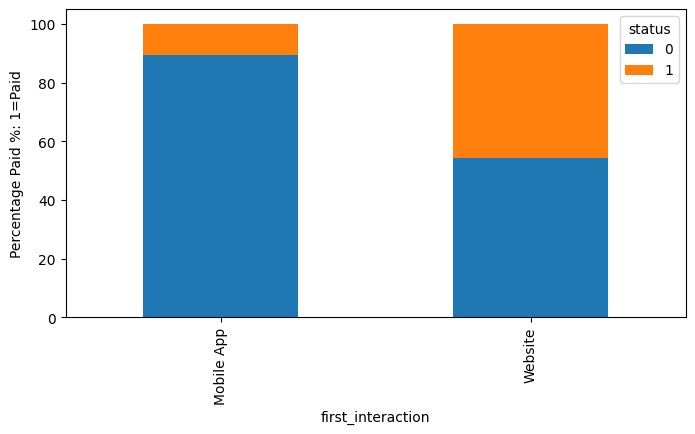

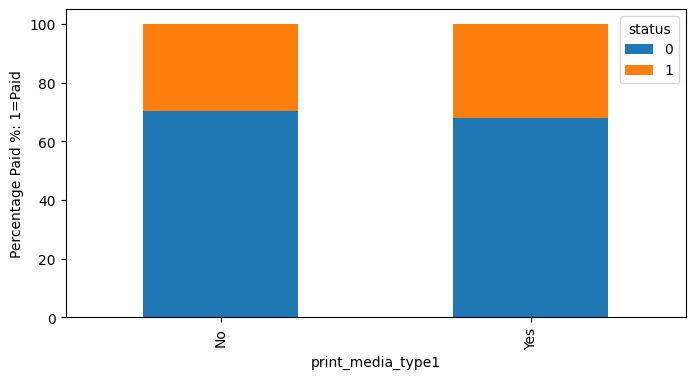

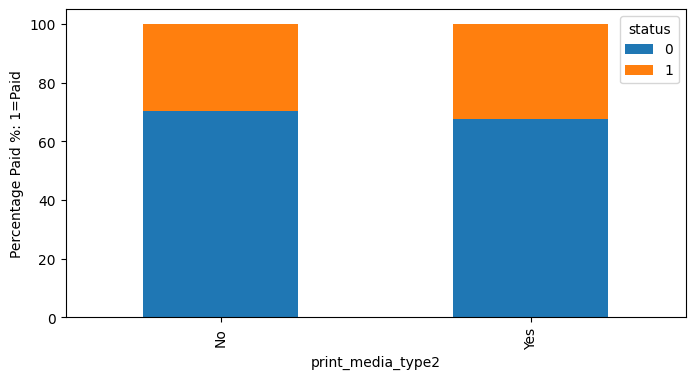

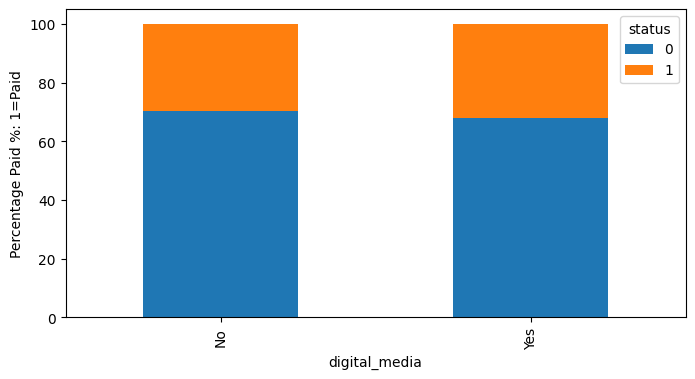

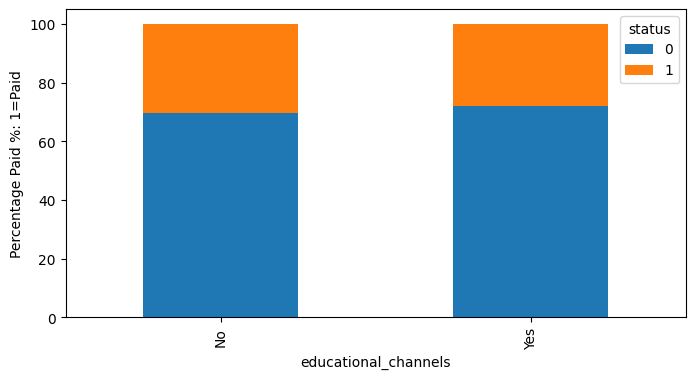

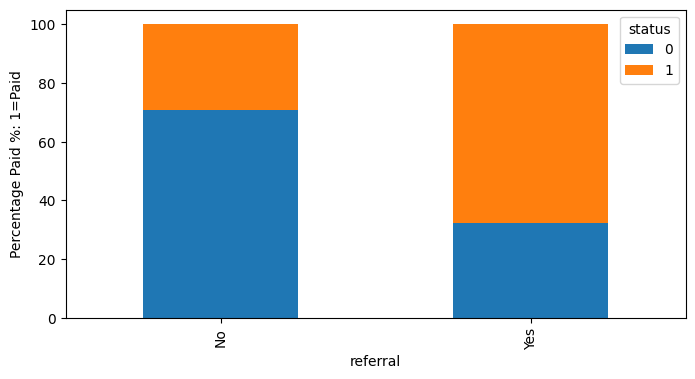

In [109]:
#showing ratio of paid customers to individual discrete columns
for i in cat_cols:
    if i!='status':
        (pd.crosstab(el[i],el['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4), stacked=True)
        plt.ylabel('Percentage Paid %: 1=Paid')

**OBSERVATIONS**

Almost all customers will take the time to complete at least half of their profile. Finding ways to have more high completions could help with conversions to paid customers.

Most customers are employed; however, a good amount are unemployed, meaning there might still be opportunity to convert the unemployed into paid customers.

Half of customers most recently engaged via email.

Interestingly, phone activity and website activity are about even.

First interactions with ExtraaLearn were mostly via the mobile app. First interactions with the website acquired way more paid customers than via the mobile app.

There are about 30% of paid customers via print media (newspapers and magazines), digital media, and educational channels.

Word of mouth (referrals) is still a great way to acquire more paid customers.



In [110]:
# Mean of numerical variables grouped by status
el.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
status,,,,,
0,45.153014,3.578980,577.420711,3.025732,0.0
1,48.663762,3.538126,1068.397967,3.027050,1.0


**OBSERVATIONS**

Paid customers on average spend a little less than twice the amount of time on the website, meaning they'll take the time to do the research and/or fill out their profile and enter their payment info to become a paid customer. We've found out something about paid customers, but not enough for definitive conclusions.

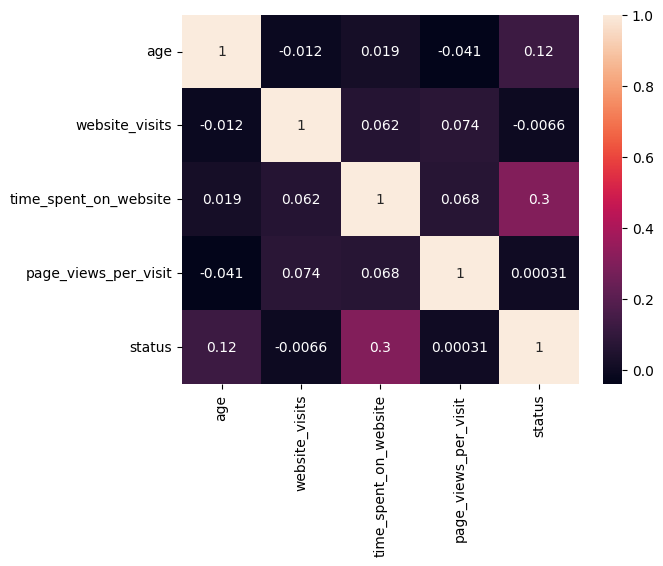

In [111]:
#Creating a heatmap for the numbered columns to status
el_corr=el[num_cols].corr()
sns.heatmap(el_corr, annot=True)
plt.show()

**HEATMAP OBSERVATIONS**

Status correlates highest with age and time spent on website. Of course, correlation does not equal causation, so more analysis is needed.

## Building a Decision Tree model

In [112]:
#Getting dummies for non-numerical data columns
el = pd.get_dummies(data=el, columns = cat_cols, drop_first=True)

In [113]:
#setting up independent and dependent variables
Y=el.status
X=el.drop(['status'], axis=1)

In [114]:
#taking log of page views per visit since there are a ton of outliers for that variable only
el['page_views_per_visit']=np.log1p(el['page_views_per_visit'])

In [115]:
#splitting data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [116]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.299, 1: 0.701}, random_state = 42)

In [117]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.299, 1: 0.701}, random_state=42)

In [118]:
#for confusion matrix, precision, recall, etc.
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Unpaid', 'Paid'], yticklabels=['Unpaid', 'Paid'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Accuracy:  0.9997289238275956


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



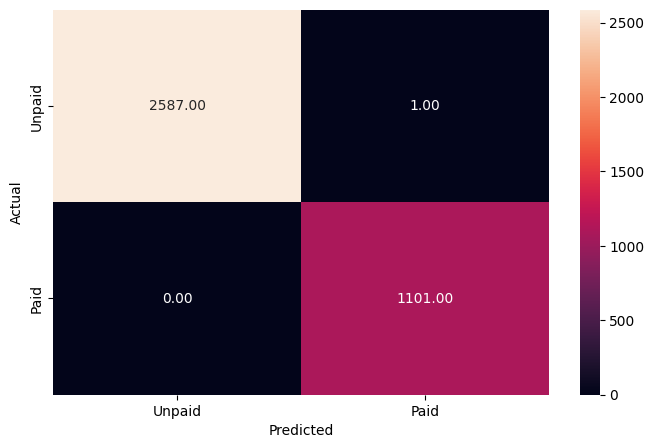

None


In [119]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

print ("Accuracy: ", accuracy_score(y_train, y_train_pred_dt))
print("\n")
print (metrics_score(y_train, y_train_pred_dt))

Accuracy:  0.8147345612134345


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       647
           1       0.70      0.66      0.68       276

    accuracy                           0.81       923
   macro avg       0.78      0.77      0.77       923
weighted avg       0.81      0.81      0.81       923



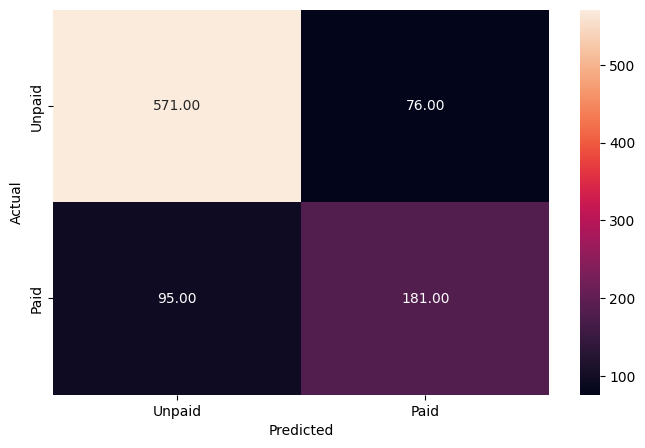

None


In [120]:
#visualizing precision, accuracy, etc. for testing dataset
y_test_pred_dt = dt.predict(X_test)

print ("Accuracy: ", accuracy_score(y_test, y_test_pred_dt))
print("\n")
print (metrics_score(y_test, y_test_pred_dt))

## Do we need to prune the tree?

**OBSERVTION**

Data was scaled due to "time spent on website" has high raw values and could skew the decision tree.

In the test model, the accuracy score is too high at 100%, meaning the model is overfitting.

In the test model, there is a 16% gap in the Precision between unpaid and paid customers.

We want to lower the amount of false positives (predicted paid customers who are actually unpaid customers), so we don't overestimate gross profits. This means we'll want to increase Precision in the descision tree model. We'll do that by pruning the tree.

In [121]:
# Training the unpruned tree
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [122]:
#grabbing candidate alphas
ccp_alphas = path.ccp_alphas

In [123]:
#Train a tree for each alpha and evaluate
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [124]:
#Pick the one with best precision on the test set
from sklearn.metrics import precision_score
precisions = [precision_score(y_test, clf.predict(X_test), average='macro') for clf in clfs]

In [125]:
#Choose the best tree
best_index = precisions.index(max(precisions))
best_clf = clfs[best_index]
print(f"Best ccp_alpha: {ccp_alphas[best_index]}")
print("Best precision:", precisions[best_index])

Best ccp_alpha: 0.0013396814697980309
Best precision: 0.8505397779549776


In [126]:
#getting test results
y_pred_prune= best_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       647
           1       0.82      0.71      0.76       276

    accuracy                           0.87       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.87      0.86       923



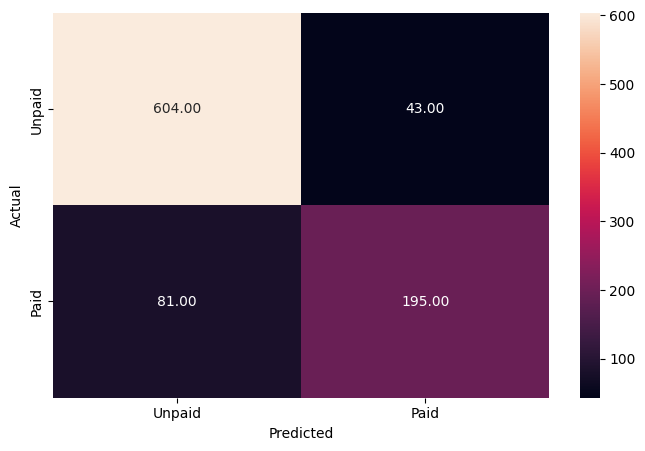

None


In [127]:
#visualizing precision, accuracy, etc.
print (metrics_score(y_test, y_pred_prune))

**OBSERVATIONS**

Post-pruning improves Precision from a 16% to a 6% gap.

## Building a Random Forest model

In [128]:
#Building the Random Forest
rf=RandomForestClassifier(class_weight={0: 0.299, 1: 0.701},random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.299, 1: 0.701}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



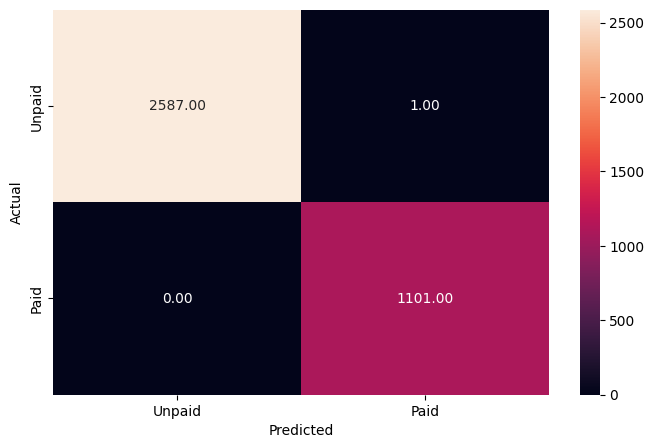

In [129]:
# Checking performance on the training data
y_pred_train_rf = rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       647
           1       0.80      0.72      0.76       276

    accuracy                           0.86       923
   macro avg       0.84      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923



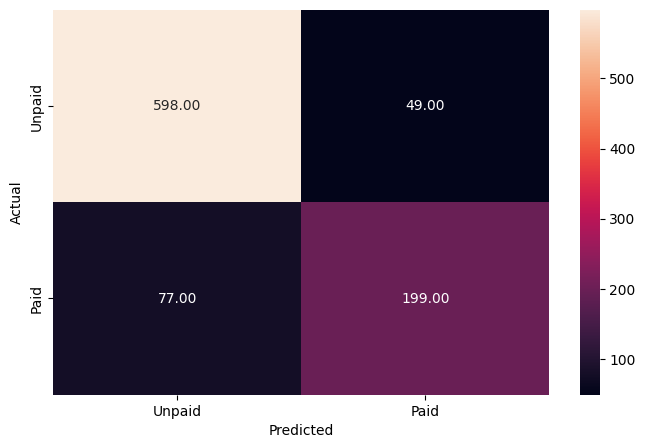

In [130]:
# Checking performance on the testing data
y_pred_test_rf = rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## Do we need to prune the tree?

**OBSERVATIONS**

The model training data is overfitting.
The test data has a 9% gap in precision between unpaid and paid customers.
It's pretty good, but I'm too detail-oriented not to try and improve the random forest model.

Since post-pruning the random forest model is not possible, I'll rebuild a new model "pre-pruned," i.e., hyperparameter tuning.

In [131]:
#base model
rf_prune=RandomForestClassifier(class_weight={0: 0.299, 1: 0.701},random_state=42)

In [132]:
# Define your parameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [100, 200],
}

In [133]:
# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_prune,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='precision'
)

In [134]:
#fitting to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.299, 1: 0.701},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='precision', verbose=2)

In [135]:
#getting the best model
best_rf = grid_search.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



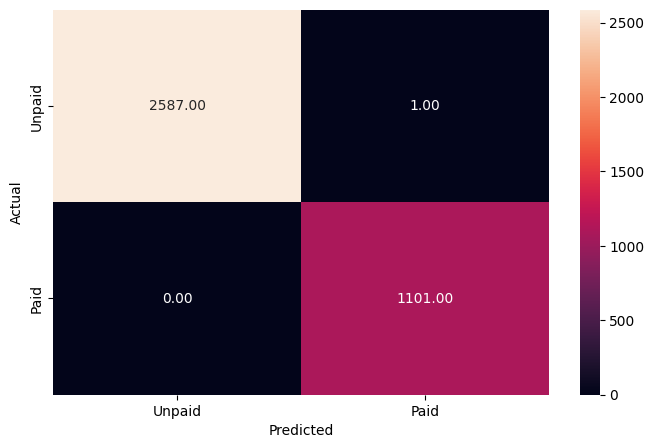

In [136]:
# Checking performance on the training data
y_pred_train_rf_prune = best_rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf_prune)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       647
           1       0.79      0.71      0.75       276

    accuracy                           0.86       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.85      0.86      0.85       923



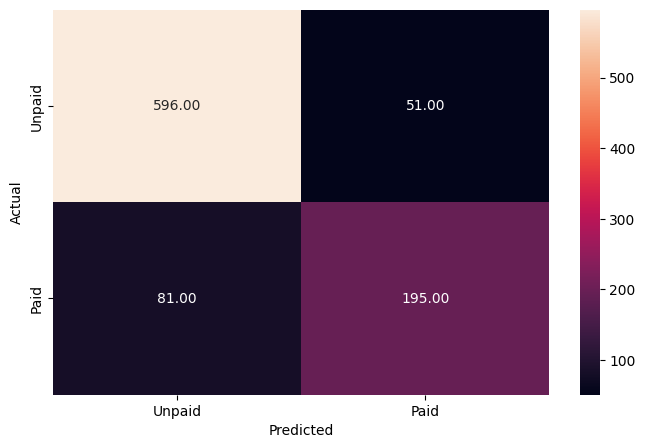

In [137]:
# Checking performance on the test data
y_pred_test_rf_prune = best_rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf_prune)

**OBSERVATIONS**

Re-training the random forest model using GridSearchCV resulted in slightly worse results: a 9% gap in precision and 21% gap in recall (up from the 20% gap in recall pre-remodeling).

Comparing all four models after pruning, the pruned decision tree model is the best one to use as it has the best precision and recall of the four.

In [138]:
# Getting importances from pruned Decision Tree
importances = best_clf.feature_importances_

# If your features came from a DataFrame, use those column names:
feature_names = X_train.columns

# Zip it all together and sort:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                           Feature  Importance
2            time_spent_on_website    0.272878
10       first_interaction_Website    0.260527
5         profile_completed_Medium    0.205228
8     last_activity_Phone Activity    0.069642
0                              age    0.067609
7    current_occupation_Unemployed    0.057901
9   last_activity_Website Activity    0.034758
4            profile_completed_Low    0.018519
6       current_occupation_Student    0.012938
3             page_views_per_visit    0.000000
1                   website_visits    0.000000
11           print_media_type1_Yes    0.000000
12           print_media_type2_Yes    0.000000
13               digital_media_Yes    0.000000
14        educational_channels_Yes    0.000000
15                    referral_Yes    0.000000


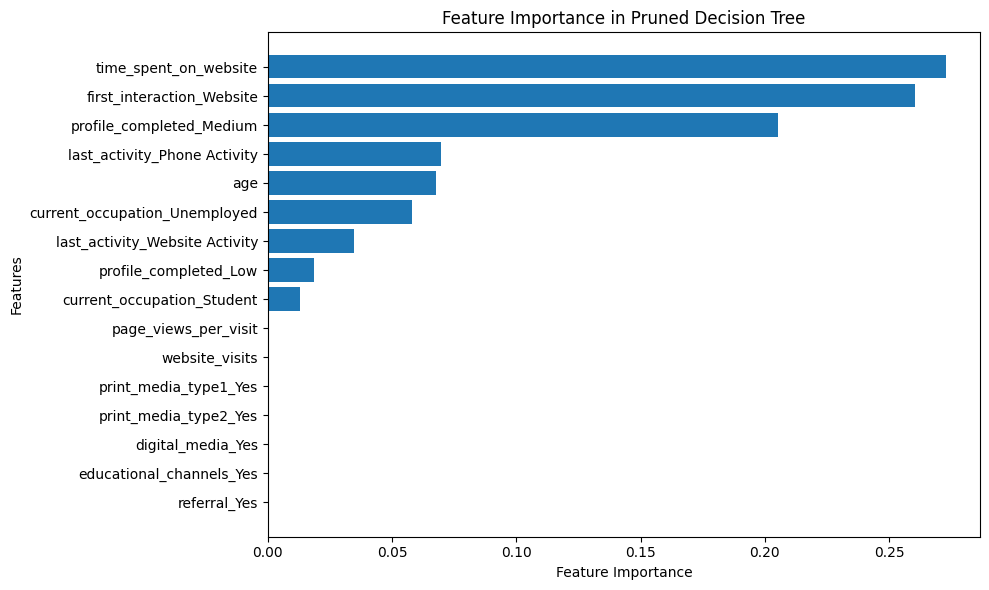

In [139]:
#visualizing importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Pruned Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Actionable Insights and Recommendations

The model suggests the most important features are:

1. Average time spent on website (congruent with the heatmap)
2. First interaction on website
3. Profile completed - medium (completed at least 50% of their profile)
4. Last activity - phone activity
5. Age (also congruent with the heatmap)

The other four features (not in order):

1. current occupation - Unemployed
2. current occupation - Student
3. last activity - Website
4. profile completed - Low

... while not as important as the top 5, are worth looking into as opportunities to increase paid customers.

I'd recommend the following:

1. Make profile completion easier, e.g., reduce the amount of required info and/or optional info to include, etc. This will help convert low profile completion to medium completion, which should help convert to paid customers.
2. Increase efforts to market to the Unemployed and Students (in that order) to visit the website. Since most students are younger, this could potentially help cover younger clients, as the boxplot data for age shows most customers are a little older.
3. Further incentivize leads to visit the website.
4. Follow-up communication with a phone call (when possible) after the customer leaves the website with some kind of incentive to become a paid customer.